# 导入

In [1]:
import numpy as np
import pandas as pd
import melody_machine as mm
from melody_machine.visualizer.base_visualizer import BaseVisualizer
from melody_machine.visualizer.videoifier import MovieVisualizer
import mido
from re import findall
from scipykit.mtp_initializer import *
from pathlib import Path
PI = np.pi

plt.plot()
plt.ioff()
plt.close()

np.set_printoptions(precision=8,linewidth=110,threshold=4000,suppress=True)

%load_ext autoreload
%autoreload 1
%aimport melody_machine, melody_machine.base.note, melody_machine.base.chord, melody_machine.miditools.song, melody_machine.visualizer.base_visualizer, melody_machine.visualizer.base_types, melody_machine.visualizer.videoifier

d:\Projects\工程项目\旋律机\chord_db.csv


In [302]:
def find_library_path(library_name):
    import importlib.util
    spec = importlib.util.find_spec(library_name)
    library_path = spec.origin if spec else "模块未找到"
    # print(library_path)
    return library_path


find_library_path('melody_machine')

'd:\\Projects\\工程项目\\旋律机\\melody_machine\\__init__.py'

# 复杂工程测试

## 弗拉门戈

In [ ]:
midi_fp = 'D:/Music/FL Project/工程_流行/弗拉门戈弦乐v1.0/弗拉门戈弦乐_20240811_TUO.mid'
mtracks = mm.MTracks(midi_fp)
# mtracks._parse_midifile(midi_fp)
mtracks['Joshua Bell Violin_V1.0']
mtracks.get_note_playing(2)

array([[ 71.        ,  82.        ,   1.75      ,   2.        ,   0.25      ,  11.        ],
       [ 84.        ,  46.        ,   2.        ,   2.1875    ,   0.1875    ,  11.        ],
       [ 83.        ,  85.        ,   2.1875    ,   2.375     ,   0.1875    ,  11.        ],
       [ 81.        , 101.        ,   2.375     ,   2.625     ,   0.25      ,  11.        ],
       [ 83.        ,  82.        ,   2.625     ,   2.75      ,   0.125     ,  11.        ],
       [ 81.        ,  94.        ,   2.75      ,   2.875     ,   0.125     ,  11.        ],
       [ 80.        ,  77.        ,   2.875     ,   3.        ,   0.125     ,  11.        ],
       [ 81.        , 108.        ,   3.        ,   3.125     ,   0.125     ,  11.        ],
       [ 80.        ,  78.        ,   3.125     ,   3.1875    ,   0.0625    ,  11.        ],
       [ 80.        , 101.        ,   3.1875    ,   3.3125    ,   0.125     ,  11.        ],
       [ 77.        ,  89.        ,   3.3125    ,   3.375     ,   0.06

In [321]:
midi_fp = 'D:/Music/FL Project/工程_流行/弗拉门戈弦乐v1.0/弗拉门戈弦乐_20240811_TUO.mid'
song = mm.Song(midi_fp)
song[5]

,pit,vel,t_st,t_ed,t_dur,mid_ch,ch_id,name
0,55,100,4.0,5.062500,1.062500,8,8,Str Main
1,72,100,5.0,5.187500,0.187500,13,12,AGT &KS
2,76,96,5.0,5.125000,0.125000,12,11,Pno #2
3,42,77,5.0,6.000000,1.000000,0,13,AGT Mld
4,45,78,5.0,6.000000,1.000000,0,13,AGT Mld
5,50,82,5.0,6.000000,1.000000,0,13,AGT Mld
6,69,97,5.0,5.145833,0.145833,0,15,Felt Pno
7,66,100,5.0,5.130208,0.130208,0,15,Felt Pno
8,74,103,5.0,5.130208,0.130208,0,15,Felt Pno
9,50,100,5.0,6.062500,1.062500,8,8,Str Main


In [322]:
song.quantify(1)[5, 'Felt Pno'].get_chord().astype('notation').detect_chord()

{'chord name': 'DM /A',
 'root note': 'D',
 'chord data': 和弦标记           M
 名称         major
 优先级           90
 音程         0,4,7
 度数      1P,3M,5P
 组成音数           3
 音程结构       Major
 记号          M,^,
 音高集合        2192
 Name: 0, dtype: object}

['Pno #2', 'Felt Pno', 'Felt Pno #2', 'Pno #1']


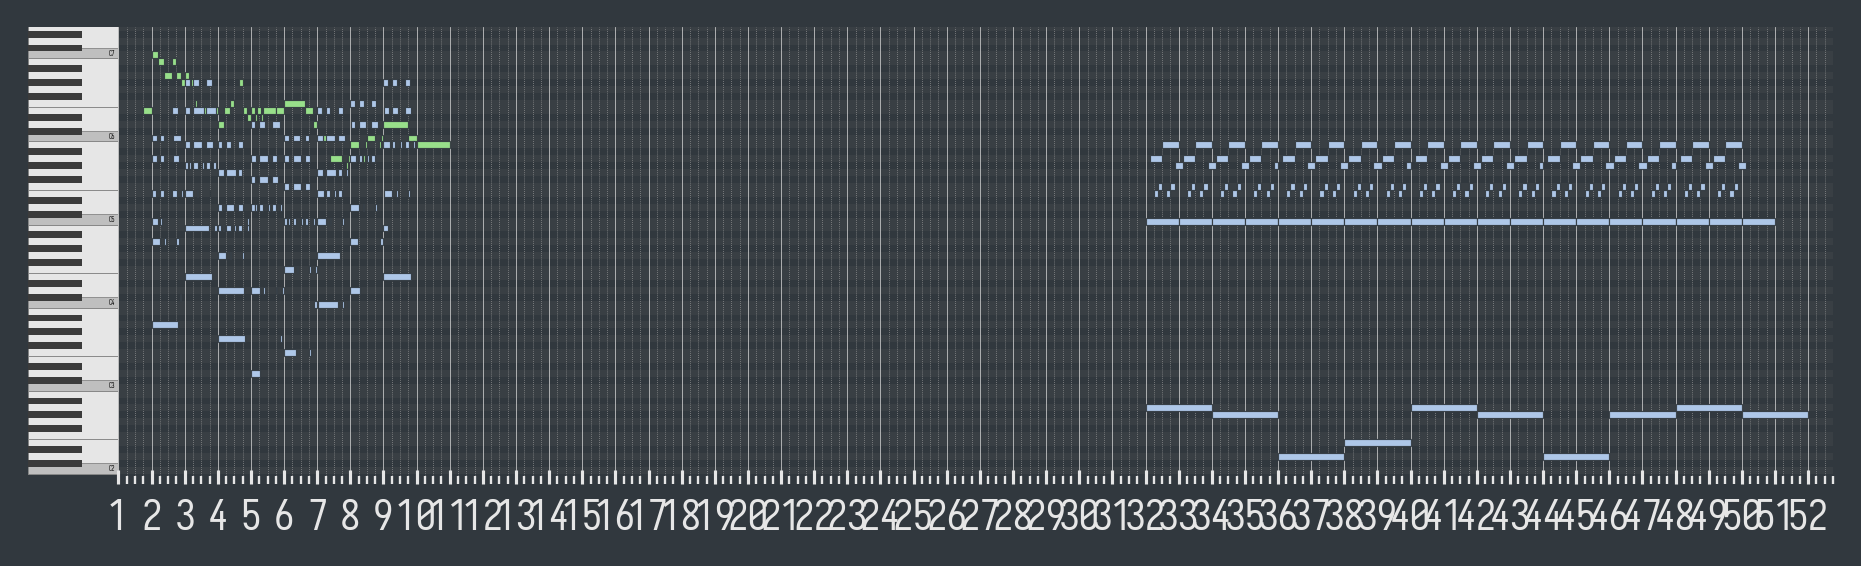

In [13]:
vis = BaseVisualizer()
vis.display(song[:50, song.search_channels('pno')])

In [19]:
%%timeit -r 5 -n 20

sd[(sd['name'] == 'AGT &KS')]

141 µs ± 15.2 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)


In [ ]:
%%timeit -r 5 -n 20

s[:, 'AGT &KS']

16 µs ± 7.92 µs per loop (mean ± std. dev. of 5 runs, 20 loops each)


In [ ]:
song[5.125, song.search_channels('Pno')].get_chord().astype('notation')

['A5' 'F#5' 'D6' 'D3' 'D4' 'D#6']

In [ ]:
song[5.125,
        song.search_channels('Pno')].get_chord().astype('notation'
                                                        ).detect_chord()

{'chord name': 'DM /A',
 'root note': 'D',
 'chord data': 和弦标记           M
 名称         major
 优先级           90
 音程         0,4,7
 度数      1P,3M,5P
 组成音数           3
 音程结构       Major
 记号          M,^,
 音高集合        2192
 Name: 0, dtype: object}

In [81]:
song[5.125].get_chord().astype('notation').detect_chord()

{'chord name': 'D7 /C',
 'root note': 'D',
 'chord data': 和弦标记                   7
 名称      dominant seventh
 优先级                   90
 音程              0,4,7,10
 度数           1P,3M,5P,7m
 组成音数                   4
 音程结构               Major
 记号                 7,dom
 音高集合                2194
 Name: 2, dtype: object}

In [262]:
song.search_channels(['jbv'])

['JBV', 'JBV #2']

### 测试可视化

In [19]:
vis = MovieVisualizer()

In [20]:
song[:10]

,pit,vel,t_st,t_ed,t_dur,mid_ch,ch_id,name
0,48,66,1.000000,1.125000,0.125000,2,2,Addictive Drums 2
1,48,66,1.250000,1.375000,0.125000,2,2,Addictive Drums 2
2,48,81,1.500000,1.625000,0.125000,2,2,Addictive Drums 2
3,76,82,1.750000,2.000000,0.250000,12,11,Pno #2
4,71,82,1.750000,2.000000,0.250000,11,10,Joshua Bell Violin_V1.0
...,...,...,...,...,...,...,...,...
357,64,107,9.750000,9.791667,0.041667,0,15,Felt Pno
358,76,100,9.875000,10.000000,0.125000,13,12,AGT &KS
359,71,96,9.885417,9.937500,0.052083,0,15,Felt Pno
360,71,86,10.000000,11.000000,1.000000,11,10,Joshua Bell Violin_V1.0


In [ ]:
vis.play(song[:10]).display_in_notebook(fps=30)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


## POP909

In [307]:
# 导入文件

PATH_POP909 = Path('D:/Storage/Datasets/POP909')
lst_midi = list(PATH_POP909.glob('**/*.mid'))
lst_chord = list(PATH_POP909.glob('**/chord_midi*'))

In [308]:
song = mm.Song(lst_midi[0], bpB=4, tpb=480, InitBar=0)
song.Bar, song.bpM, song.tpb, song.step

(1920, 90.0, 480, 120)

In [309]:
song[:2]

,pit,vel,t_st,t_ed,t_dur,mid_ch,ch_id,name
0,66,121,0.895833,1.002083,0.106250,1,1,BRIDGE
1,47,65,1.020833,1.368229,0.347396,2,2,PIANO
2,75,121,1.020833,1.144271,0.123438,1,1,BRIDGE
3,54,49,1.083333,1.379688,0.296354,2,2,PIANO
4,73,118,1.145833,1.214062,0.068229,1,1,BRIDGE
5,59,59,1.145833,1.343229,0.197396,2,2,PIANO
6,66,100,1.208333,1.512500,0.304167,2,2,PIANO
7,71,123,1.270833,1.347917,0.077083,1,1,BRIDGE
8,80,118,1.395833,1.445312,0.049479,1,1,BRIDGE
9,82,104,1.458333,1.518229,0.059896,1,1,BRIDGE


In [310]:
vis = BaseVisualizer(**song.__dict__)

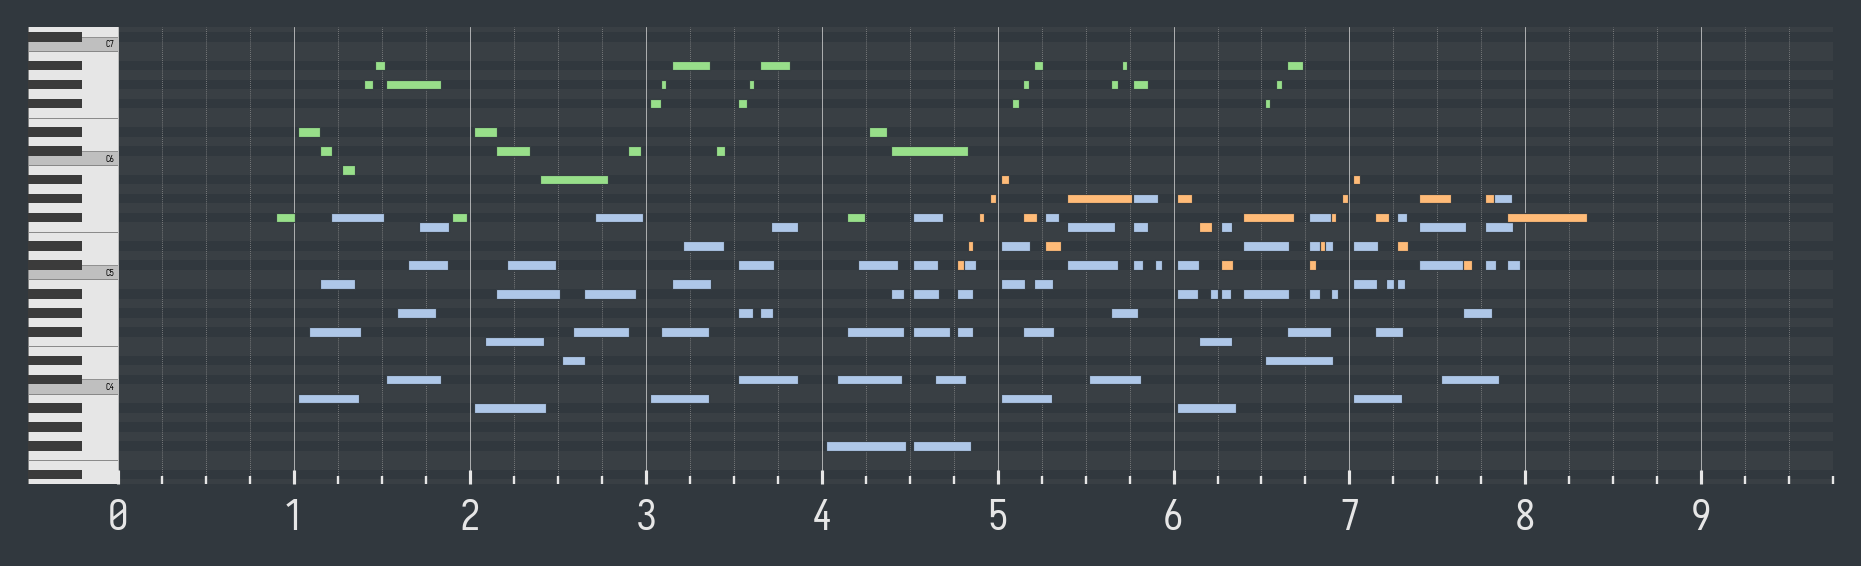

In [311]:
vis.display(song[0:8])

In [312]:
song[1:1.5].get_chord().detect_chord()

{'chord name': 'F#Madd9',
 'root note': 'F#',
 'chord data': 和弦标记                Madd9
 名称                      -
 优先级                    70
 音程               0,4,7,14
 度数            1P,3M,5P,9M
 组成音数                    4
 音程结构                Major
 记号      Madd9,2,add9,add2
 音高集合                 2704
 Name: 6, dtype: object}

In [314]:
df = pd.read_csv(lst_chord[0], header=None, sep='\t')
df.rename(columns={0: 'st', 1: 'ed', 2: 'chord'}, inplace=True)
df[['st', 'ed']
   ] = ((df[['st', 'ed']] - df.loc[0, 'st']) / 60 * song.bpM).round(2)
df.loc[:15]

,st,ed,chord
0,0.0,1.0,N
1,1.0,2.0,N
2,2.0,3.0,N
3,3.0,4.0,N
4,4.0,6.0,B:maj
5,6.0,8.0,C#:maj
6,8.0,10.0,Bb:min
7,10.0,12.0,Eb:min
8,12.0,14.0,B:maj
9,14.0,16.0,C#:maj


# RAW MIDI测试

In [315]:
song = mm.Song('assets/test_颜色通道.mid')
song.display_backend = 'pandas'
disp(song)

,pit,vel,t_st,t_ed,t_dur,mid_ch,ch_id,name
0,12,100,1.00,1.2500,0.2500,1,0,test instrument
1,14,100,1.25,1.5000,0.2500,1,0,test instrument
2,16,100,1.50,1.7500,0.2500,1,0,test instrument
3,17,100,1.75,2.0000,0.2500,1,0,test instrument
4,12,100,2.00,2.3125,0.3125,1,0,test instrument
5,12,100,2.25,2.5625,0.3125,1,0,test instrument
6,12,100,2.50,2.8125,0.3125,1,0,test instrument
7,12,100,2.75,3.0000,0.2500,1,0,test instrument


In [47]:
midi = mido.MidiFile('assets/test_颜色通道.mid')
midi.tracks[2][16]

Message('note_on', channel=1, note=12, velocity=100, time=0)

In [318]:
a = np.fromfile('assets/test_颜色通道.mid', dtype=np.uint8)[8 + 6:-3]
a

array([ 77,  84, 114, 107,   0,   0,   0,  12,   0, 255,  88,   4,   4,   2,  24,   8,   0, 255,  47,   0,
        77,  84, 114, 107,   0,   0,   0,  11,   0, 255,  81,   3,   6, 138,  27,   0, 255,  47,   0,  77,
        84, 114, 107,   0,   0,   0, 219,   0, 255,   3,  15, 116, 101, 115, 116,  32, 105, 110, 115, 116,
       114, 117, 109, 101, 110, 116,   0, 177,  10,  64,   0, 177,   7, 100,   0, 225,   0,  64,   0, 177,
       101,   0,   0, 177, 100,   0,   0, 177,   6,  12,   0, 177,  10,  64,   0, 177,   7, 100,   0, 225,
         0,  64,   0, 177, 101,   0,   0, 177, 100,   0,   0, 177,   6,  12,   0, 177,  10,  64,   0, 177,
         7, 100,   0, 225,   0,  64,   0, 145,  12, 100,   0, 177, 101,   0,   0, 177, 100,   0,   0, 177,
         6,  12,   0, 177,  10,  64,   0, 177,   7, 100,   0, 225,   0,  64,  96, 129,  12,  64,   0, 145,
        14, 100,  96, 129,  14,  64,   0, 145,  16, 100,  96, 129,  16,  64,   0, 145,  17, 100,  96, 129,
        17,  64,   0, 145,  12, 100, 

In [319]:
np.char.upper(np.char.mod('%02x', a))

array(['4D', '54', '72', '6B', '00', '00', '00', '0C', '00', 'FF', '58', '04', '04', '02', '18', '08', '00',
       'FF', '2F', '00', '4D', '54', '72', '6B', '00', '00', '00', '0B', '00', 'FF', '51', '03', '06', '8A',
       '1B', '00', 'FF', '2F', '00', '4D', '54', '72', '6B', '00', '00', '00', 'DB', '00', 'FF', '03', '0F',
       '74', '65', '73', '74', '20', '69', '6E', '73', '74', '72', '75', '6D', '65', '6E', '74', '00', 'B1',
       '0A', '40', '00', 'B1', '07', '64', '00', 'E1', '00', '40', '00', 'B1', '65', '00', '00', 'B1', '64',
       '00', '00', 'B1', '06', '0C', '00', 'B1', '0A', '40', '00', 'B1', '07', '64', '00', 'E1', '00', '40',
       '00', 'B1', '65', '00', '00', 'B1', '64', '00', '00', 'B1', '06', '0C', '00', 'B1', '0A', '40', '00',
       'B1', '07', '64', '00', 'E1', '00', '40', '00', '91', '0C', '64', '00', 'B1', '65', '00', '00', 'B1',
       '64', '00', '00', 'B1', '06', '0C', '00', 'B1', '0A', '40', '00', 'B1', '07', '64', '00', 'E1', '00',
       '40', '60', 

# 五度圈绘制

In [ ]:
fifths_circle = [
    'C',
    'G',
    'D',
    'A',
    'E',
    'B',
    'F#;Gb',
    'C#;Db',
    'G#;Ab',
    'D#;Eb',
    'A#;Bb',
    'F'
    ]

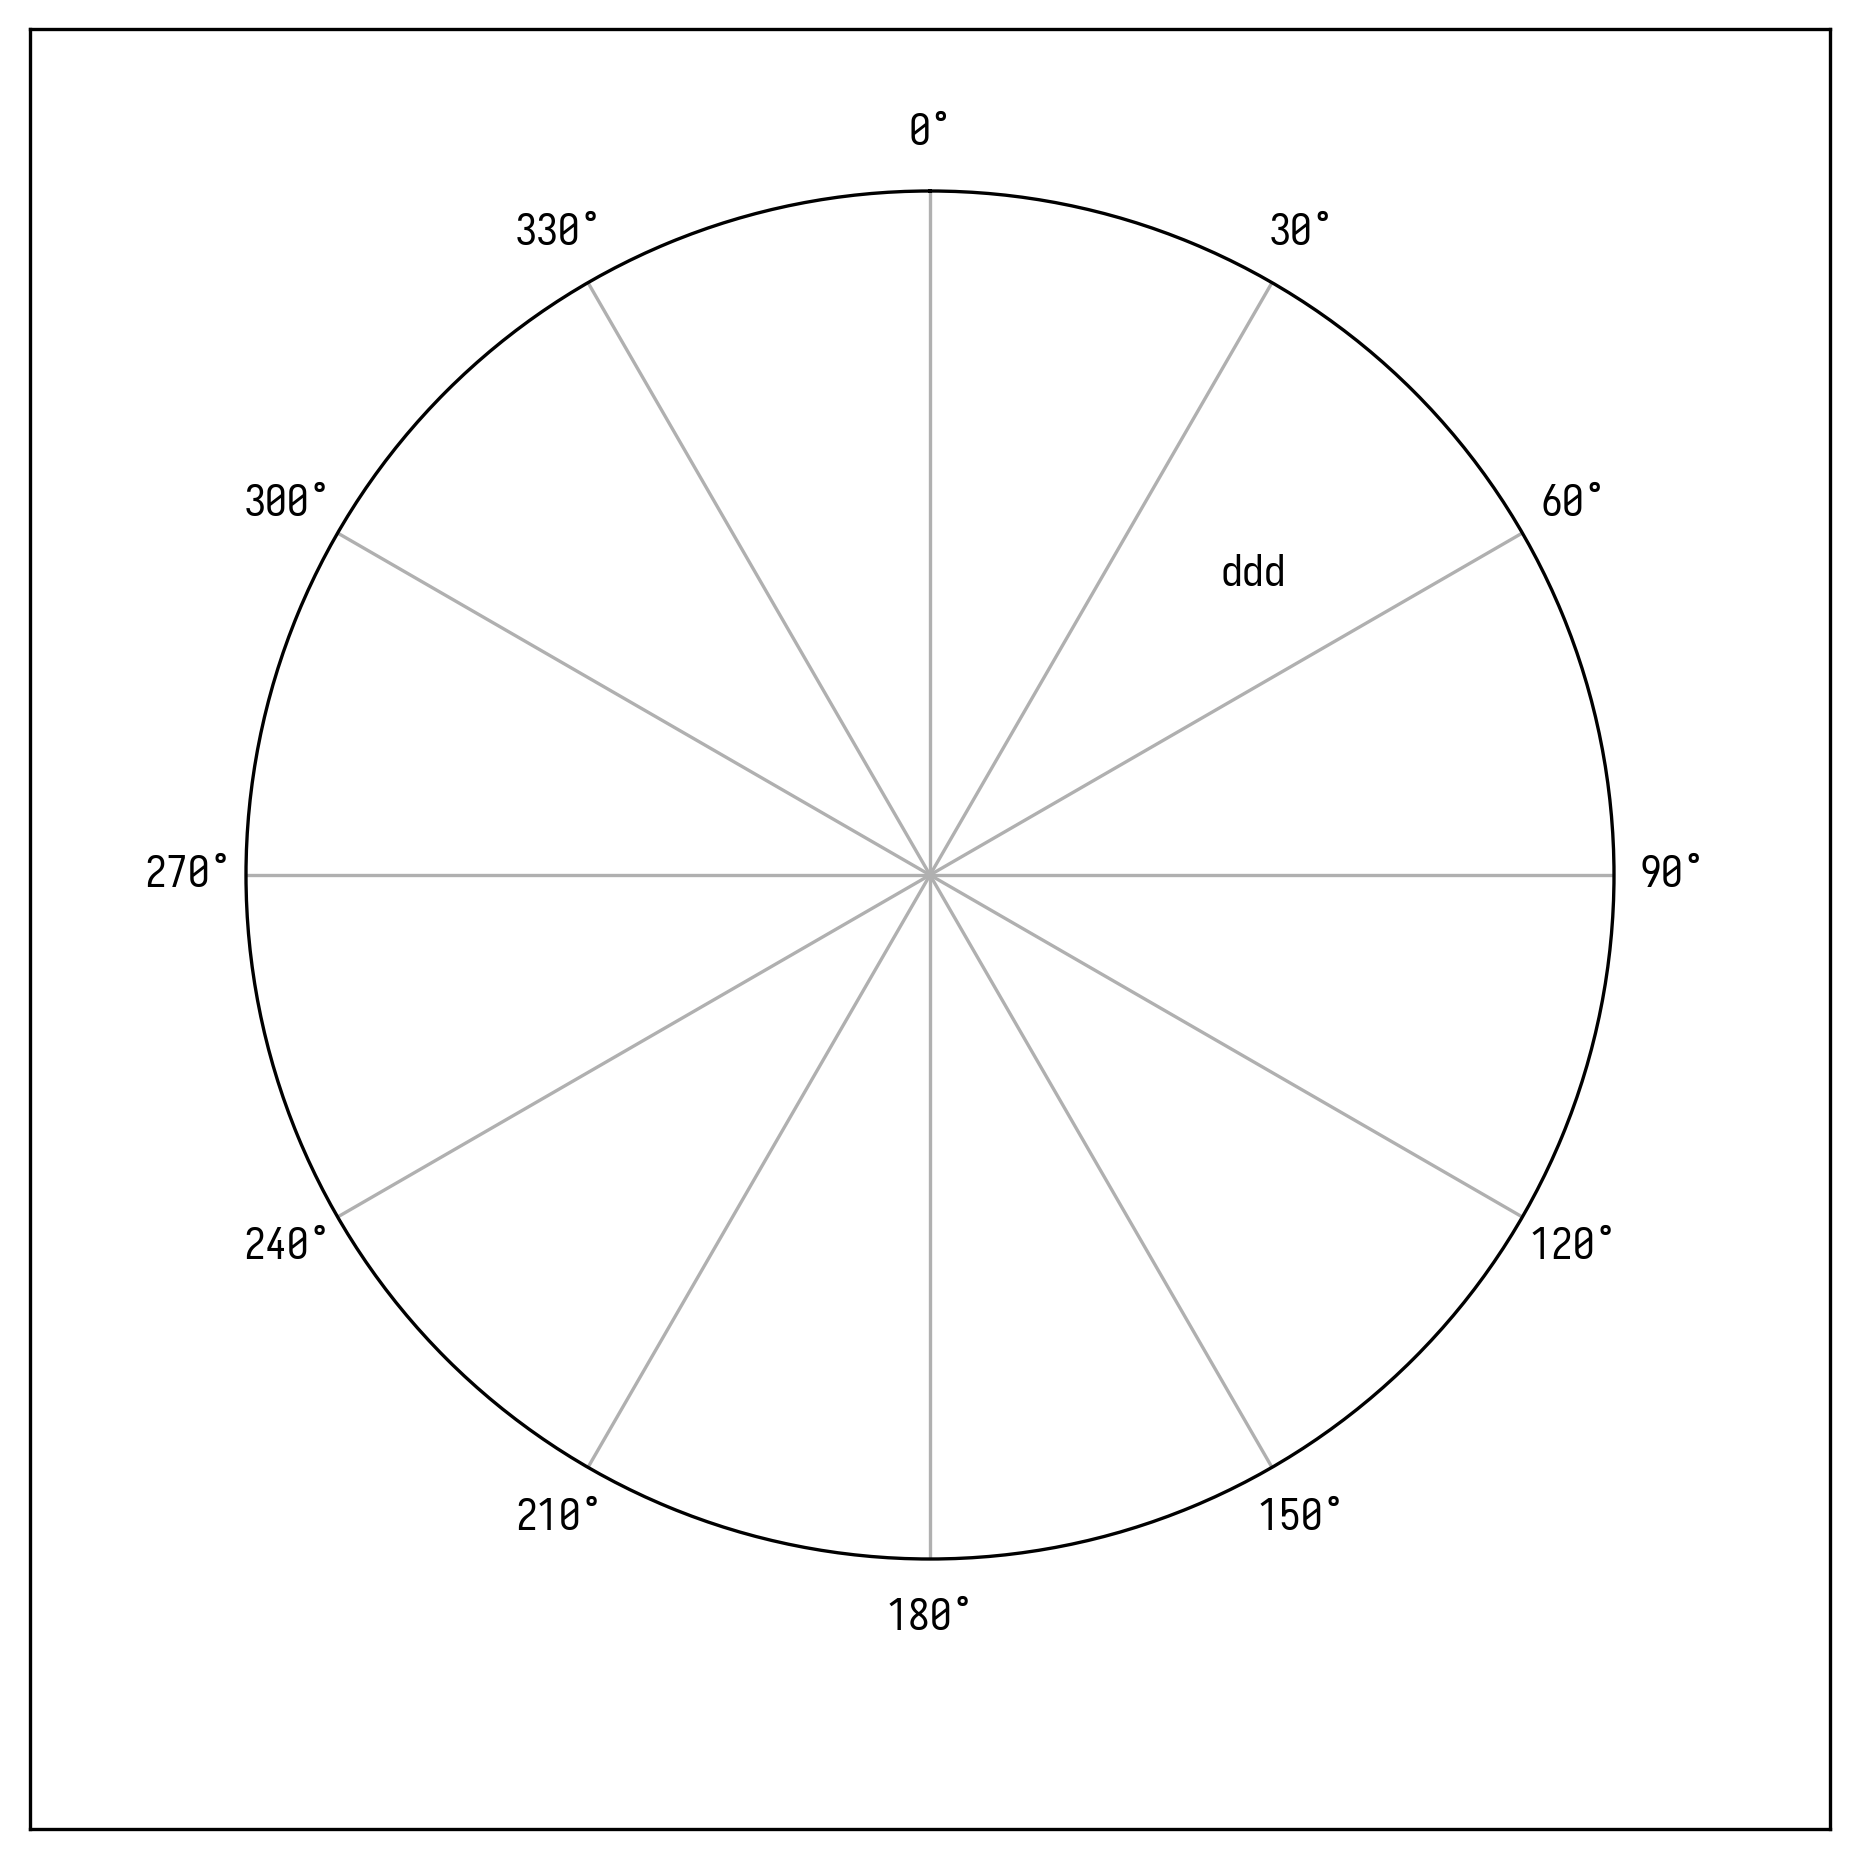

In [ ]:
plt.close()
fig = mfigure((6, 6), alpha=1)
ax: PolarAxes = fig.add_subplot(1, 1, 1, projection='polar')

ax.text(np.deg2rad(45), 0.6, 'ddd')

ax.set_theta_offset(np.deg2rad(90))
ax.set_rlabel_position(0)      # 极轴标记所在角度
ax.set_rlim([0, 1])
ax.set_rgrids([0, 0.8])        # 极轴网格，等效上面的yticks
                               # ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# ax.axis('off')
# ax.set_xticks(np.linspace(0, 2 * PI, len(fifths_circle), endpoint=False))
ax.set_thetagrids(
    np.linspace(0, 360, len(fifths_circle), endpoint=False)
    )                                                       # 角度网格
ax.set_theta_direction(-1)                                  # 朝向
disp(fig)

<img class="center" src="assets/image.png" width=40%>

# 测试项目

In [ ]:
def parse_note(n: str):
    '''
    获得midi音高
    '''
    tmp = findall('^\s*(\S)\s*([#b])*\s*(\d*)\s*$', n)
    return tmp


arr_note = [
    'C0', 'G', 'C5', 'G#5', 'Ab13', ' G ', ' C 5 ', ' G # 5 ', ' A b 13 '
    ]
for n in arr_note:
    print(parse_note(n))
    print(mm.note.nta2pit(n))

[('C', '', '0')]
0
[('G', '', '')]
67
[('C', '', '5')]
60
[('G', '#', '5')]
68
[('A', 'b', '13')]
164
[('G', '', '')]
67
[('C', '', '5')]
60
[('G', '#', '5')]
68
[('A', 'b', '13')]
164


In [ ]:
df = mm.CHORD_DB.copy()

In [ ]:
df

,和弦标记,名称,优先级,音程,度数,组成音数,音程结构,记号,音高集合
0,M,major,90,"0,4,7","1P,3M,5P",3,Major,"M,^,",2192
1,m,minor,90,"0,3,7","1P,3m,5P",3,Minor,"m,min,-",2320
2,7,dominant seventh,90,"0,4,7,10","1P,3M,5P,7m",4,Major,"7,dom",2194
3,5,fifth,85,"0,7","1P,5P",2,Unknown,5,2064
4,sus2,suspended second,75,"0,2,7","1P,2M,5P",3,Unknown,sus2,2576
...,...,...,...,...,...,...,...,...,...
101,9#11b13,-,0,"0,4,7,10,14,18,20","1P,3M,5P,7m,9M,11A,13m",7,Major,"9#11b13,9b5b13",2746
102,13#11,-,0,"0,4,7,10,14,18,21","1P,3M,5P,7m,9M,11A,13M",7,Major,"13#11,13+4,13#4",2742
103,M13#11,-,0,"0,4,7,11,14,18,21","1P,3M,5P,7M,9M,11A,13M",7,Major,"M13#11,maj13#11,M13+4,M13#4",2741
104,7#9#11b13,-,0,"0,4,7,10,15,18,20","1P,3M,5P,7m,9A,11A,13m",7,Major,7#9#11b13,2490


In [ ]:
arr_chord = mm.progression([
    ['C4', 'E4', 'G4'],                                                # C
    ['G4', 'C5', 'E5', 'C6'],                                          # C/G
    ['E', 'F#', 'B'],                                                  # Esus2 Bsus4
    ['D', 'G'],                                                        # G5
    ['B', 'E', 'F#'],                                                  # Bsus4 Esus2
    ['C', 'D', 'E', 'G'],                                              # Cadd9
    ['G', 'F', 'A', 'B'],
    ['G', 'B', 'D', 'Eb'],
    ])
a = arr_chord.astype('pitch')
print(a)
for shift in range(3):
    detections = a.detect_chord(shift)
    print(
        f'series: {shift}', [det['chord name'] for det in detections],
        '\n'
        )

d:\Projects\工程项目\旋律机\100-branch_master\chord_db.csv
[[48 52 55], [55 60 64 72], [64 66 71], [62 67], [71 64 66], [60 62 64 67], [67 65 69 71], [67 71 62 63]]
series: 0 ['CM', 'CM /G', 'Esus2', 'G5 /D', 'Bsus4', 'CMadd9', 'G7', 'GM'] 

series: 1 ['C7', 'CM /G', 'Bsus4 /E', 'GM /D', 'Esus2 /B', 'CM', 'GMadd9', 'G7'] 

series: 2 ['C5', 'C7 /G', 'E5', 'Gm /D', 'B5', 'Csus2', 'FMadd9 /G', 'G5'] 



In [ ]:
with open('C:/Users/Gray/Desktop/output.txt') as f:
    data = f.read()
data

In [ ]:
arr_chord_p = mm.progression([[np.int8(pit) for pit in mat.split(' ')]
                                for mat in findall('-> \[(.+?)\],', data)])
arr_chord_p

# Ref

In [317]:
%%HTML

<style>
    h1,
    h2,
    h3,
    p,
    code,
    ul,
    ol,
    body {
        /* --vscode-font-family: "Sarasa Mono SC"; */
        font-family: "Inconsolata", "Sarasa Mono SC";
    }

    img.center {
        display: flex;
        align-self: center;
        justify-self: center;
        align-items: center;
        justify-content: center;
    }
</style>